<a href="https://colab.research.google.com/github/charlie-1106/ML-Hub/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
class Linearregression:
  def __init__(self,lr=0.001,n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None

#Model Creation
  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0
    for _ in range(self.n_iters):
      y_pred=np.dot(X,self.weights)+self.bias #Equation= y=wX + B where w= weights and b=bias
      dw=(1/n_samples)*np.dot(X.T,(y_pred-y)) #Gradient with respect to weights
      db=(1/n_samples)*np.sum(y_pred-y) #Gradient with respect to bias
      self.weights-=self.lr*dw #Weights Updation
      self.bias-=self.lr*db #bias Updation

  #Prediction
  def predict(self,X):
    y_pred=np.dot(X,self.weights)+self.bias
    return y_pred

305.7719958301902


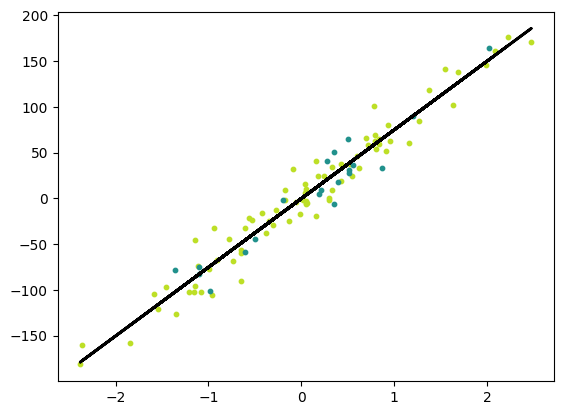

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

#Creating data set
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
#Calling our custom regressor with sufficient LR
regressor=Linearregression(lr=0.01)
#Model Fit and Training
regressor.fit(X_train,y_train)
#Predictions
predicted=regressor.predict(X_test)
#For evaluation Using MSE
def mse(y_test,predicted):
  return np.mean((y_test-predicted)**2)
mse_value=mse(y_test,predicted)
print(mse_value)
#Scatter Plots for Visualization
y_predline=regressor.predict(X)
cmap=plt.get_cmap('viridis')
m1=plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2=plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_predline,color='black',lw=2,label='Prediction')
plt.show()
